In [1]:
!pip install japanize-matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import cm
from matplotlib import rcParams
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
import japanize_matplotlib

In [2]:
# フォント設定
#rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0

# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

red   = '#C4240E', # 赤色：アクセントカラー1
black = '#1C1C1C', # 黒色：アクセントカラー2

%matplotlib inline

# **単回帰分析**

## 準備

In [3]:
# データ
x_data = np.array([16.00, 18.00, 20.00, 23.00, 24.00, 28.00,  30.00]) # 説明変数(部屋の広さ)
y_data = np.array([5.3, 5.1, 6.1, 7.3, 8.4, 9.0, 8.9]) # 目的変数(家賃[万円])

In [4]:
def calc_diff(x_data,y_data,a,b):
    """直線とデータ点との差分の二乗和を計算する

    Args:
        x_data (List[float]): データ点の x の値
        y_data (List[float]): データ点の y の値
        a (float): 切片
        b (float): 傾き

    Returns:
        float : 差分の二乗和
    """
    return np.sum( ( (a + x_data*b) - y_data )**2 )

In [5]:
a_data = []
b_data = []
z_data = []

for a in np.arange(-3,1,0.005):
    a_tmp = []
    b_tmp = []
    z_tmp = []
    for b in np.arange(-0.3,1.0,0.005):
        z = calc_diff(x_data,y_data,a,b)
        a_tmp += [a]
        b_tmp += [b]
        z_tmp += [z]
        
    a_data += [a_tmp]
    b_data += [b_tmp]
    z_data += [z_tmp]
    
    
a_data = np.array(a_data)
b_data = np.array(b_data)
z_data = np.array(z_data)

## **回帰直線を求める**

【実験】  
部屋の広さと家賃の関係を以下の式で回帰する。  
- $a + bx$
- $x$ は部屋の広さであり, 家賃($y$)を予測する。
- そのために、パラメーター $a,b$ を左図を見ながら調整する。
    
【確認事項】
- うまく回帰出来ている時に**差分の二乗和**が小さくなっていることを確認する。

In [6]:
def try_least_squares(a,b):
    """データ点と直線の図とその時の差分の二乗和の値の図を表示する。

    Args:
        a (float): 切片
        b (float): 傾き
    """

    x_data = np.array([16.00, 18.00, 20.00, 23.00, 24.00, 28.00,  30.00]) # 説明変数(部屋の広さ)
    y_data = np.array([5.3, 5.1, 6.1, 7.3, 8.4, 9.0, 8.9]) # 目的変数(家賃[万円])

    np.sum( ( (a*x_data + b) - y_data )**2 )

    # 描画の準備
    fig = plt.figure(dpi=100, figsize=(10, 5))
    ax  = fig.add_subplot(1,2,1)
    
    # 軸のラベル設定
    ax.set_xlabel("部屋の広さ") # 通常表記
    ax.set_ylabel("家賃") # 斜体にしたい場合の表記（日本語には対応していない模様）

    ax.scatter(
        x_data, y_data,
        s=60,
    )

    # 軸の設定
    ax.set_ylim(0, 15)
    ax.set_xlim(15, 31)

    x_plot = np.arange(15,40,10)
    
    y_data_ = a + b * x_plot
    ax.plot(x_plot, y_data_, color="red", label="回帰直線")
    
    diff = calc_diff(x_data,y_data,a,b)
    
    
    # 描画の準備
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    diff = calc_diff(x_data,y_data,a,b)
    ax2.plot_surface(a_data, b_data, z_data, alpha = 0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax2.scatter([a],[b], [diff+300], alpha = 0.5, color="red")
    
    # 軸のラベル設定
    ax2.set_xlabel("a", labelpad=15)
    ax2.set_ylabel("b" , labelpad=15)
    ax2.set_zlabel("least squares", labelpad=15)
    
    ax2.set_xlim(-3,1)
    ax2.set_ylim(-0.5,1.5)
    ax2.set_zlim(0, 2000)
    

    fig.subplots_adjust()
    plt.show()



In [7]:
interact(try_least_squares, a=(-3,1,0.005), b=(-0.5,1,0.005) )

interactive(children=(FloatSlider(value=-1.0, description='a', max=1.0, min=-3.0, step=0.005), FloatSlider(val…

<function __main__.try_least_squares(a, b)>

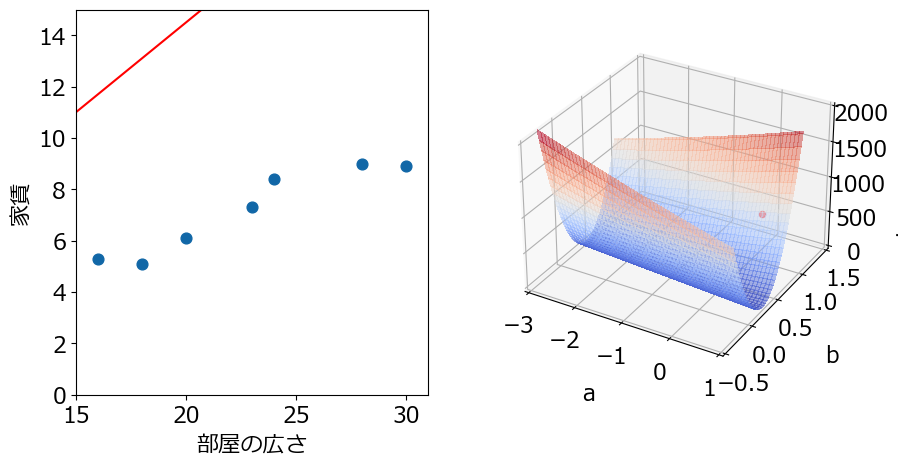

In [8]:
##-- 変更する変数 --##
a = 0.5 #切片
b = 0.7 #傾き 
##------------------##
try_least_squares(a, b)

## **最小二乗法で回帰直線を求める**
【確認事項】
最小二乗法の結果を見てみる

In [18]:
def least_squares(x_data, y_data):
    """最小二乗法で回帰係数を求める。

    Args:
        x_data (List[float]): データ点の x の値
        y_data (List[float]): データ点の y の値

    Returns:
        Tuple(float, float): (切片, 傾き)
    """
    
    b = np.cov(x_data, y_data)[0][1] / np.var(x_data)
    a = np.mean(y_data) - b * np.mean(x_data)
    
    return a, b

In [19]:
# 最小二乗法
a, b = least_squares(x_data, y_data)
y_data_ = a + b * x_data

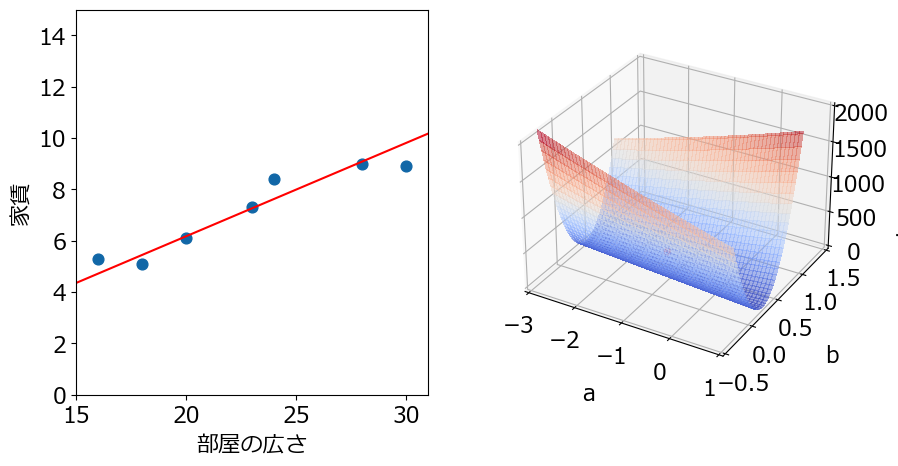

In [20]:
try_least_squares(a,b)

### **回帰直線と残差の性質の確認**

In [12]:
# 平均を通る
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)
y_mean_= np.mean(y_data_)

print("観測値の平均：", y_mean)
print("予測値の平均：", y_mean_)

観測値の平均： 7.1571428571428575
予測値の平均： 7.157142857142858



<br>

# **重回帰分析**

【確認事項】  
重回帰における最小二乗法の結果のイメージを掴む

## 回帰平面を求める

In [13]:
x1_data = np.array([16.00, 18.00, 20.00, 23.00, 24.00, 28.00,  30.00]) # 説明変数1(部屋の広さ)
x2_data = np.array([17, 22, 16, 13, 10, 8, 13]) # 説明変数1(築年数)
y_data = np.array([5.3, 5.1, 6.1, 7.3, 8.4, 9.0, 8.9]) # 目的変数(家賃)

In [14]:
def least_squares_multi(x1_data, x2_data, y_data):
    """
    最小二乗法で回帰ベクトルを求める。
    """
    x1 = x1_data.reshape(-1, 1)
    x2 = x2_data.reshape(-1, 1)
    ones = np.ones(len(x1)).reshape(-1, 1)
    X = np.concatenate([ones, x1, x2], 1)
    
    a, b1, b2 = np.linalg.pinv(X.T @ X) @ X.T @ y_data
    return a, b1, b2

In [15]:
# 最小二乗法
a, b1, b2 = least_squares_multi(x1_data, x2_data, y_data)
X1, X2 = np.meshgrid(np.arange(16, 30, 1), np.arange(8, 22, 1))
Y = a + b1 * X1 + b2 * X2


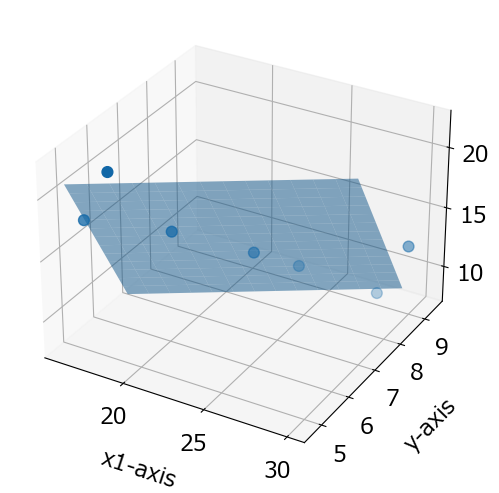

In [16]:
# 描画の準備
fig = plt.figure(dpi=100, figsize=(10, 6))
ax  = fig.add_subplot(projection="3d")

# 軸のラベル設定
ax.set_xlabel("x1-axis", labelpad=15)
ax.set_ylabel("y-axis" , labelpad=15)
ax.set_zlabel("x2-axis", labelpad=15)

ax.scatter(
    x1_data, y_data, x2_data,
    s=60,
    
)
ax.plot_surface(X1, Y, X2, alpha = 0.5)

# 軸の設定
# ax.set_ylim(40000, 100000)
# ax.set_xlim(15, 31)
plt.show()